In [2]:
# Ibragimov Aydar, 11-004

## Homework 1

### Test Central Limit Theorem on single-modal distribution

from numpy.random import seed
from numpy.random import randint
from numpy import mean
import matplotlib.pyplot as plt

In [5]:
seed(1000-7)

In [35]:
### I dont know python
avg = []
for i in range(1000):
    points = randint(0, 100, 22)
    avg.insert(i, int(mean(points)))

In [36]:
print('avgs = ', avg)

avgs =  [36, 59, 52, 53, 59, 52, 39, 50, 51, 46, 64, 52, 56, 45, 54, 46, 54, 50, 52, 52, 61, 43, 49, 48, 50, 54, 67, 44, 44, 43, 48, 45, 57, 52, 57, 51, 54, 46, 55, 46, 48, 48, 46, 51, 65, 50, 44, 41, 43, 61, 45, 47, 51, 44, 54, 55, 52, 40, 40, 43, 54, 54, 60, 47, 54, 48, 58, 52, 45, 53, 58, 47, 46, 47, 49, 52, 57, 54, 52, 49, 43, 54, 49, 52, 44, 44, 58, 51, 53, 49, 42, 53, 58, 50, 54, 42, 50, 41, 36, 55, 55, 62, 39, 40, 52, 52, 49, 54, 58, 57, 55, 53, 50, 47, 52, 66, 50, 49, 58, 40, 55, 43, 50, 50, 56, 58, 45, 49, 44, 44, 56, 57, 43, 41, 45, 44, 49, 47, 52, 39, 33, 47, 46, 57, 52, 42, 45, 53, 64, 45, 50, 42, 49, 49, 44, 42, 51, 39, 49, 55, 40, 47, 53, 45, 53, 32, 52, 49, 50, 51, 47, 47, 48, 53, 52, 48, 40, 40, 49, 55, 52, 55, 36, 44, 39, 58, 57, 42, 41, 37, 49, 50, 45, 46, 46, 41, 58, 53, 56, 46, 61, 35, 46, 51, 49, 52, 54, 52, 51, 46, 43, 46, 44, 54, 50, 55, 50, 41, 51, 56, 60, 50, 48, 52, 53, 42, 56, 56, 52, 40, 44, 52, 54, 39, 55, 52, 48, 47, 59, 45, 48, 50, 41, 64, 46, 69, 53, 51,

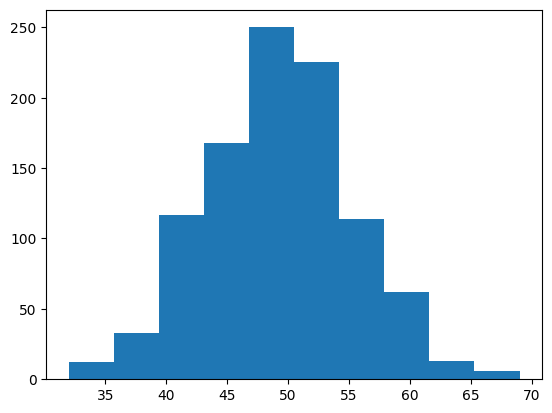

Avg of avg:  49.3


In [37]:
plt.hist(avg)
plt.show()
print('Avg of avg: ', mean(avg))

### OK, it looks like normal distribution

(array([  2.,  10.,  40.,  62.,  59., 118.,  76.,  71.,  41.,  21.]),
 array([0.03309449, 0.03471026, 0.03632602, 0.03794179, 0.03955756,
        0.04117332, 0.04278909, 0.04440485, 0.04602062, 0.04763638,
        0.04925215]),
 <BarContainer object of 10 artists>)

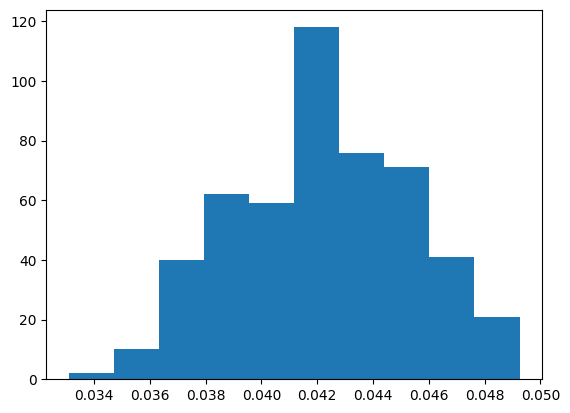

In [3]:
### HW 1.1

### Code from last lecture, added only loop for 500 iterations and calculating mean values

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.neighbors import KernelDensity

avg = []
for i in range(500):
    n = 5000
    dist_frac = 0.1
    x1 = np.random.normal(randint(-5,-1),2,int(n*dist_frac))
    x2 = np.random.normal(randint(1,5),3,int(n*(1-dist_frac)))
    x = np.concatenate((x1,x2))
    np.random.shuffle(x)
    eval_points = np.linspace(np.min(x), np.max(x))

    kde_sk = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde_sk.fit(x.reshape([-1,1]))
    y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1,1)))
    avg.insert(i, mean(y_sk))
plt.hist(avg)


### OK, Cental Limit Theorem is working :)

C:\Users\Master18\AppData\Local\Temp\ipykernel_9136\3292241238.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


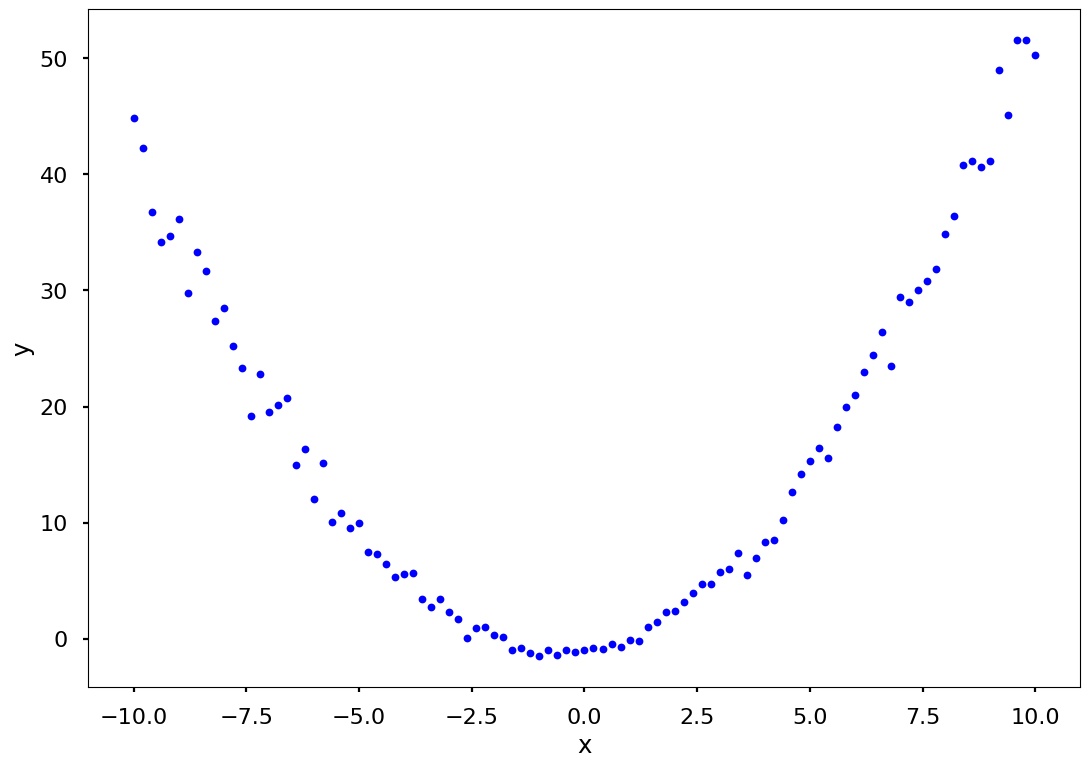

In [4]:
### HW 1.2 - Regression

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

### My function will be 1 + x + 0,5x^2
x = np.linspace(-10, 10, 101)
y = -1 + 0.5 * x * x + x * np.random.random(len(x))

plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Look for my noisy points:

[ 0.49077645  0.52563848 -0.67035345]


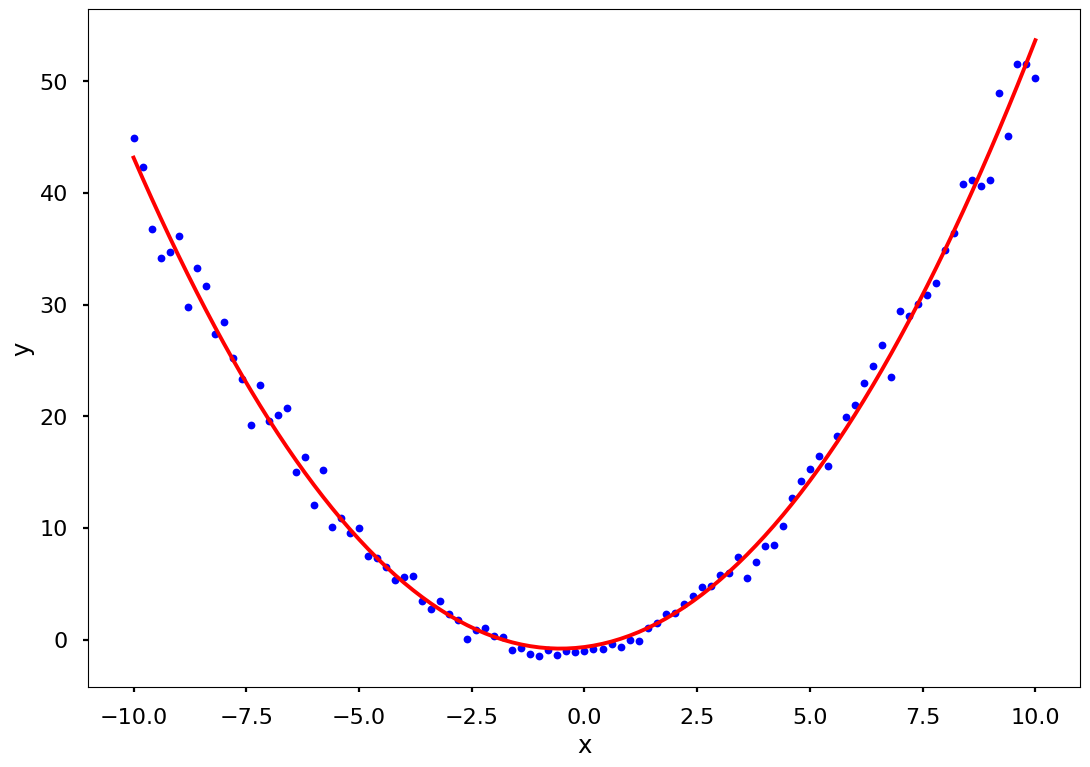

In [7]:
### I will use Optimize curve_fit to solve task:

def func(x, a, b, c):
    y = a*x*x + b*x + c
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x*x + alpha[1]*x + alpha[2], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Perfect approximation!

C:\Users\Master18\AppData\Local\Temp\ipykernel_5436\2813025221.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


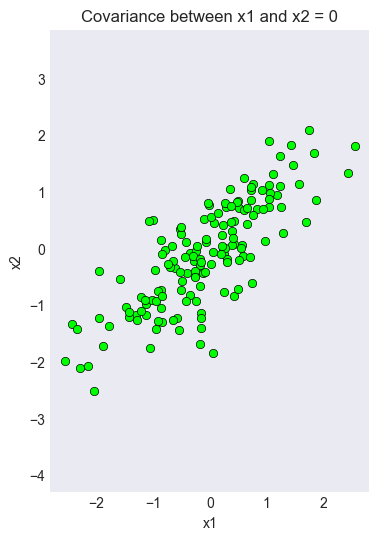

In [30]:
### Additional task for HW 1.1: 2-dimensional distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
random_seed=10
 
mean = np.array([0,0])
 
plt.subplot(1,3,1)
     
cov = np.array([[1, 0.8], [0.8, 1]])
     
distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)

data = distr.rvs(size = 150)
     
plt.plot(data[:,0],data[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Covariance between x1 and x2 = {val}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
     
plt.show()

### This plot is used only to view how looks one distribution

C:\Users\Master18\AppData\Local\Temp\ipykernel_5436\605242672.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


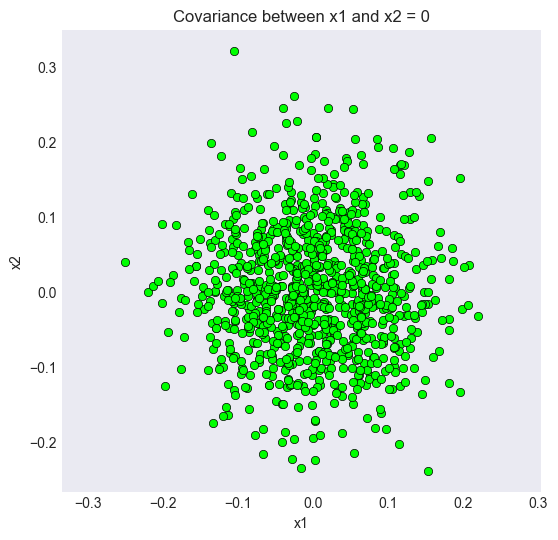

In [38]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=21,6
 
random_seed=10
 
mean = np.array([0,0])
 
plt.subplot(1,3,1)
     
cov = np.array([[1, 0], [0, 1]])
     
distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
x1mean = []
x2mean = []

### Here i got 1k distributions and calculated mean values for all:

for i in range(1000):
    data = distr.rvs(size = 150)
    data = data.T
    data = data.sum(axis=1) / 150
    x1mean.insert(0, data[0])
    x2mean.insert(0, data[1])
    #print(data)
     
plt.plot(x1mean, x2mean, 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Covariance between x1 and x2 = {val}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
     
### Plot might be like normal distribution...
    
plt.show()